In [1]:
%reset -f
from pythonrc import *

# Simple test

## Setup the environment and the configuration

Load the allocator with Minimum Magnitude reference filter

In [2]:
allocator = skadipy.allocator.PseudoInverse(
    actuators=[
        tunnel,
        voithschneider_port,
        voithschneider_starboard
    ],
    force_torque_components=[
        skadipy.allocator.ForceTorqueComponent.X,
        skadipy.allocator.ForceTorqueComponent.Y,
        skadipy.allocator.ForceTorqueComponent.N
    ]
)

allocator.compute_configuration_matrix()

In [3]:
data = generate_spiral_dataset(
    num_points=1000,
    num_turns=5,
    k=1
)

We need to send vectors $\tau = [X, Y, Z, K, M, N]^\top$. Even if the number of
controlled DOFs are different, we still need to send a vector with the same size.

Say, we control $\tau_{mode=1} = [X, Y, N]^\top$, than we should simply send
```python
>>> X, Y, Z = 0, 0, 0
>>> tau = np.array([X, Y, 0, 0, 0, N])
```

In [4]:
history_f = []

for i in range(n := data.shape[0]):
    X = data[i, 0]
    Y = data[i, 1]
    tau = np.array([[X, Y, 0, 0, 0, 0]], dtype=np.float32).T
    xi = allocator.allocate(tau)

    history_f.append(f := allocator.allocated)

F = np.concatenate([i.T for i in history_f])


Text(0, 0.5, 'Y')

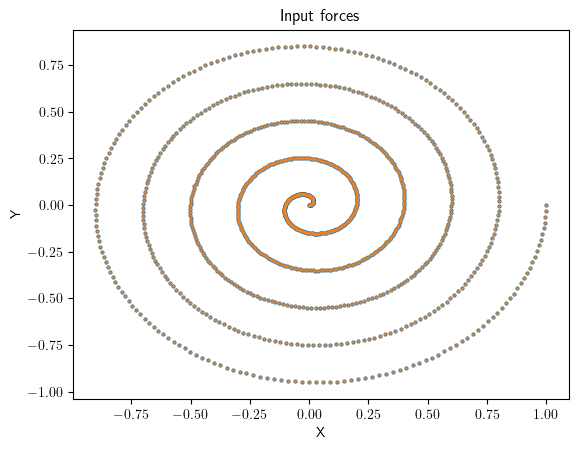

In [5]:
plt.scatter(data[:, 0], data[:, 1], s=4)
plt.scatter(F[:, 0], F[:, 1], s=1)
plt.title("Input forces")
plt.xlabel("X")
plt.ylabel("Y")